In [1]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

import pandas as pd
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
import requests

url = 'http://quotes.toscrape.com/'
response = requests.get(url)
html = response.content
print(html)

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">\xe2\x80\x9cThe world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.\xe2\x80\

#**câu 1**:cào dữ liệu từ trang web và lưu kết quả vào file 






In [3]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup

all_quotes = []
for i in range(1,6):
    url = f'https://quotes.toscrape.com/page/{i}/'
    page = urlopen(url)
    soup = BeautifulSoup(page, 'html.parser')
    quotes = soup.find_all('div', class_='quote')

    for quote in quotes:
        text = quote.find('span', class_='text').text
        author = quote.find('small', class_='author').text
        tags = quote.find('div', class_='tags').find_all('a')
        hrefs = quote.a
        link = hrefs.get('href')
        link_url = 'https://quotes.toscrape.com' + link
  
        
        tags_list = []
        for tag in tags:
            tags_list.append(tag.text)

        single_quote = [text, author, tags_list,link_url]
        all_quotes.append(single_quote)

df = pd.DataFrame(all_quotes, columns=['quote', 'author', 'tags','link'])


In [ ]:
from google.colab import drive
drive.mount('drive')

In [ ]:
df.to_csv('kq.txt')
!cp data.csv "drive/My Drive/"

In [4]:
df

,quote,author,tags,link
0,“The world as we have created it is a process ...,Albert Einstein,"[change, deep-thoughts, thinking, world]",https://quotes.toscrape.com/author/Albert-Eins...
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"[abilities, choices]",https://quotes.toscrape.com/author/J-K-Rowling
2,“There are only two ways to live your life. On...,Albert Einstein,"[inspirational, life, live, miracle, miracles]",https://quotes.toscrape.com/author/Albert-Eins...
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"[aliteracy, books, classic, humor]",https://quotes.toscrape.com/author/Jane-Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"[be-yourself, inspirational]",https://quotes.toscrape.com/author/Marilyn-Monroe
5,“Try not to become a man of success. Rather be...,Albert Einstein,"[adulthood, success, value]",https://quotes.toscrape.com/author/Albert-Eins...
6,“It is better to be hated for what you are tha...,André Gide,"[life, love]",https://quotes.toscrape.com/author/Andre-Gide
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison,"[edison, failure, inspirational, paraphrased]",https://quotes.toscrape.com/author/Thomas-A-Ed...
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt,[misattributed-eleanor-roosevelt],https://quotes.toscrape.com/author/Eleanor-Roo...
9,"“A day without sunshine is like, you know, nig...",Steve Martin,"[humor, obvious, simile]",https://quotes.toscrape.com/author/Steve-Martin


# **câu 2.**a: đọc tất cả các thẻ div với lớp quote, lưu vào biến result và in ra màn hình

In [5]:
result = soup.find_all("div", class_="quote")
print(result)

[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“A reader lives a thousand lives before he dies, said Jojen. The man who never reads lives only one.”</span>
<span>by <small class="author" itemprop="author">George R.R. Martin</small>
<a href="/author/George-R-R-Martin">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="read,readers,reading,reading-books" itemprop="keywords"/>
<a class="tag" href="/tag/read/page/1/">read</a>
<a class="tag" href="/tag/readers/page/1/">readers</a>
<a class="tag" href="/tag/reading/page/1/">reading</a>
<a class="tag" href="/tag/reading-books/page/1/">reading-books</a>
</div>
</div>, <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“You can never get a cup of tea large enough or a book long enough to suit me.”</span>
<span>by <small class="author" itemprop="author">C.S. Lewis</small>
<a 

# **câu 2.b **tìm trong biến result vừa rồi, in những dữ liệu có nhãn small và lớp author

In [7]:
for t in result:
    print(t.span.text)
    a = t.find("small", class_="author")
    author = a.text
    print("By : ", author)

“A reader lives a thousand lives before he dies, said Jojen. The man who never reads lives only one.”
By :  George R.R. Martin
“You can never get a cup of tea large enough or a book long enough to suit me.”
By :  C.S. Lewis
“You believe lies so you eventually learn to trust no one but yourself.”
By :  Marilyn Monroe
“If you can make a woman laugh, you can make her do anything.”
By :  Marilyn Monroe
“Life is like riding a bicycle. To keep your balance, you must keep moving.”
By :  Albert Einstein
“The real lover is the man who can thrill you by kissing your forehead or smiling into your eyes or just staring into space.”
By :  Marilyn Monroe
“A wise girl kisses but doesn't love, listens but doesn't believe, and leaves before she is left.”
By :  Marilyn Monroe
“Only in the darkness can you see the stars.”
By :  Martin Luther King Jr.
“It matters not what someone is born, but what they grow to be.”
By :  J.K. Rowling
“Love does not begin and end the way we seem to think it does. Love is a 

# c**âu 2.c**: viết hàm tacgia_Link lấy ngày tháng năm sinh của tác giả, in ra nội dung quote, tên tác giả, link, ngày tháng năm sinh
# c**âu 2.d**: lưu dữ liệu vào file quote.csv, lấy ít nhất 40 dữ liệu

In [102]:
def tacgia_Link(link_url):
    response = requests.get(link_url)
    html = response.content
    auth_soup = BeautifulSoup(html)
    auth = auth_soup.find("span", class_="author-born-date")
    return auth.text
all_quotes = []
for i in range(1,10):
    url = f'https://quotes.toscrape.com/page/{i}/'
    page = urlopen(url)
    soup = BeautifulSoup(page, 'html.parser')
    quotes = soup.find_all('div', class_='quote')
    for quote in quotes:
        text = quote.find('span', class_='text').text
        print(text)
        author = quote.find('small', class_='author').text
        print("By :: ", author)
        a = quote.find("small", class_="author")
        hrefs = quote.a
        link = hrefs.get('href')
        link_url = 'https://quotes.toscrape.com' + link
        print("Link of author:", link_url)
        dob = tacgia_Link(link_url)
        print("Author DOB:", dob)
     
        single_quote = [text, author, link_url,dob]
        all_quotes.append(single_quote)

df = pd.DataFrame(all_quotes, columns=['quote', 'author', 'link','dob'])


“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
By ::  Albert Einstein
Link of author: https://quotes.toscrape.com/author/Albert-Einstein
Author DOB: March 14, 1879
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
By ::  J.K. Rowling
Link of author: https://quotes.toscrape.com/author/J-K-Rowling
Author DOB: July 31, 1965
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
By ::  Albert Einstein
Link of author: https://quotes.toscrape.com/author/Albert-Einstein
Author DOB: March 14, 1879
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
By ::  Jane Austen
Link of author: https://quotes.toscrape.com/author/Jane-Austen
Author DOB: December 16, 1775
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely bor

In [75]:
df

,quote,author,link,dob
0,“The world as we have created it is a process ...,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,"March 14, 1879"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling,"July 31, 1965"
2,“There are only two ways to live your life. On...,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,"March 14, 1879"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,https://quotes.toscrape.com/author/Jane-Austen,"December 16, 1775"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,https://quotes.toscrape.com/author/Marilyn-Monroe,"June 01, 1926"
...,...,...,...,...
85,“Some day you will be old enough to start read...,C.S. Lewis,https://quotes.toscrape.com/author/C-S-Lewis,"November 29, 1898"
86,“We are not necessarily doubting that God will...,C.S. Lewis,https://quotes.toscrape.com/author/C-S-Lewis,"November 29, 1898"
87,“The fear of death follows from the fear of li...,Mark Twain,https://quotes.toscrape.com/author/Mark-Twain,"November 30, 1835"
88,“A lie can travel half way around the world wh...,Mark Twain,https://quotes.toscrape.com/author/Mark-Twain,"November 30, 1835"


In [26]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [28]:
df.to_csv('quote.csv')
!cp data.csv "drive/My Drive/"

# **khai phá dữ liệu**

# **xử lí dữ liệu**
#** 2.1 **
# điền giá trị ngày sinh
# thêm trường tuổi và điền trường tuổi cho tác giả

In [76]:
# điền trường ngày sinh dựa trên tên tác giả
df.loc[df['author'] =='Albert Einstein', 'dob'] = 'November 30, 1835'


In [77]:
df

,quote,author,link,dob
0,“The world as we have created it is a process ...,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,"November 30, 1835"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling,"July 31, 1965"
2,“There are only two ways to live your life. On...,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,"November 30, 1835"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,https://quotes.toscrape.com/author/Jane-Austen,"December 16, 1775"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,https://quotes.toscrape.com/author/Marilyn-Monroe,"June 01, 1926"
...,...,...,...,...
85,“Some day you will be old enough to start read...,C.S. Lewis,https://quotes.toscrape.com/author/C-S-Lewis,"November 29, 1898"
86,“We are not necessarily doubting that God will...,C.S. Lewis,https://quotes.toscrape.com/author/C-S-Lewis,"November 29, 1898"
87,“The fear of death follows from the fear of li...,Mark Twain,https://quotes.toscrape.com/author/Mark-Twain,"November 30, 1835"
88,“A lie can travel half way around the world wh...,Mark Twain,https://quotes.toscrape.com/author/Mark-Twain,"November 30, 1835"


In [78]:
# điền bằng chỉ mục của dòng và tên cột
df.loc[1].at['dob']= 'November 30, 1835'
# # điền bằng chỉ mục của dòng và chỉ mục của cột
df.iat[2, 3]='November 30, 1835'

In [79]:
df

,quote,author,link,dob
0,“The world as we have created it is a process ...,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,"November 30, 1835"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling,"November 30, 1835"
2,“There are only two ways to live your life. On...,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,"November 30, 1835"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,https://quotes.toscrape.com/author/Jane-Austen,"December 16, 1775"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,https://quotes.toscrape.com/author/Marilyn-Monroe,"June 01, 1926"
...,...,...,...,...
85,“Some day you will be old enough to start read...,C.S. Lewis,https://quotes.toscrape.com/author/C-S-Lewis,"November 29, 1898"
86,“We are not necessarily doubting that God will...,C.S. Lewis,https://quotes.toscrape.com/author/C-S-Lewis,"November 29, 1898"
87,“The fear of death follows from the fear of li...,Mark Twain,https://quotes.toscrape.com/author/Mark-Twain,"November 30, 1835"
88,“A lie can travel half way around the world wh...,Mark Twain,https://quotes.toscrape.com/author/Mark-Twain,"November 30, 1835"


In [80]:
df['dob'] = pd.to_datetime(df['dob'])
##tính tuổi
today = pd.to_datetime('today')
df['age'] = today.year - df['dob'].dt.year

In [81]:
df

,quote,author,link,dob,age
0,“The world as we have created it is a process ...,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1835-11-30,186
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling,1835-11-30,186
2,“There are only two ways to live your life. On...,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1835-11-30,186
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,https://quotes.toscrape.com/author/Jane-Austen,1775-12-16,246
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,https://quotes.toscrape.com/author/Marilyn-Monroe,1926-06-01,95
...,...,...,...,...,...
85,“Some day you will be old enough to start read...,C.S. Lewis,https://quotes.toscrape.com/author/C-S-Lewis,1898-11-29,123
86,“We are not necessarily doubting that God will...,C.S. Lewis,https://quotes.toscrape.com/author/C-S-Lewis,1898-11-29,123
87,“The fear of death follows from the fear of li...,Mark Twain,https://quotes.toscrape.com/author/Mark-Twain,1835-11-30,186
88,“A lie can travel half way around the world wh...,Mark Twain,https://quotes.toscrape.com/author/Mark-Twain,1835-11-30,186


# **2.2 khám phá dữ liệu**
# thống kê tác giải và câu nói nổi tiếng trong bộ dữ liệu

In [86]:
df_thongke =df[['quote', 'author']]
df_thongke[0:20]

,quote,author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe
5,“Try not to become a man of success. Rather be...,Albert Einstein
6,“It is better to be hated for what you are tha...,André Gide
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin


In [88]:
df_thongke_tuoi =df[['author','dob', 'age']]
df_thongke_tuoi[0:20]

,author,dob,age
0,Albert Einstein,1835-11-30,186
1,J.K. Rowling,1835-11-30,186
2,Albert Einstein,1835-11-30,186
3,Jane Austen,1775-12-16,246
4,Marilyn Monroe,1926-06-01,95
5,Albert Einstein,1835-11-30,186
6,André Gide,1869-11-22,152
7,Thomas A. Edison,1847-02-11,174
8,Eleanor Roosevelt,1884-10-11,137
9,Steve Martin,1945-08-14,76


# thống kê độ dài của tên tác giả

In [83]:
count = df['author'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count

2 words:    81
3 words:     8
4 words:     1
Name: author, dtype: int64

# thống kê độ dài của mỗi câu quote

In [89]:
count = df['quote'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count

10 words:     3
11 words:     4
12 words:     7
13 words:     8
138 words:    1
14 words:     3
15 words:     1
16 words:     7
17 words:     5
18 words:     2
19 words:     7
20 words:     1
201 words:    1
21 words:     3
22 words:     3
23 words:     1
24 words:     3
25 words:     3
26 words:     2
27 words:     2
28 words:     1
31 words:     2
32 words:     2
37 words:     1
41 words:     1
42 words:     1
44 words:     1
46 words:     1
47 words:     1
52 words:     1
59 words:     1
66 words:     1
7 words:      3
8 words:      1
9 words:      4
92 words:     1
Name: quote, dtype: int64

## in cau noi dai nhat 

In [90]:
# in cau noi dai nhat 

import numpy as np
lengths = df["quote"].str.len()
print(lengths)
argmax = np.where(lengths == lengths.max())[0]
df.iloc[argmax]

0     115
1      85
2     131
3     104
4     111
     ... 
85     69
86    126
87    104
88     85
89    132
Name: quote, Length: 90, dtype: int64


,quote,author,link,dob,age
10,“This life is what you make it. No matter what...,Marilyn Monroe,https://quotes.toscrape.com/author/Marilyn-Monroe,1926-06-01,95


## in cau noi ngắn nhat

In [91]:


import numpy as np
lengths = df["quote"].str.len()
print(lengths)
argmax = np.where(lengths == lengths.min())[0]
df.iloc[argmax]

0     115
1      85
2     131
3     104
4     111
     ... 
85     69
86    126
87    104
88     85
89    132
Name: quote, Length: 90, dtype: int64


,quote,author,link,dob,age
36,“We read to know we're not alone.”,William Nicholson,https://quotes.toscrape.com/author/William-Nic...,1948-01-12,73
56,"“He's like a drug for you, Bella.”",Stephenie Meyer,https://quotes.toscrape.com/author/Stephenie-M...,1973-12-24,48


## thống kê số từ được dùng trong câu

In [92]:

df.quote.str.split(expand=True).stack().value_counts()

you        72
is         65
to         61
a          53
the        49
           ..
tales.      1
safe,       1
bought      1
bleed.”     1
Also        1
Length: 864, dtype: int64

## thống kê số quote dựa theo tên của tác giải

In [93]:
for author, quote in df.groupby('author'):
   print("\nauthor: ", author)
   print("quote: \n", quote)


author:  Albert Einstein
quote: 
                                                 quote  ...  age
0   “The world as we have created it is a process ...  ...  186
2   “There are only two ways to live your life. On...  ...  186
5   “Try not to become a man of success. Rather be...  ...  186
12  “If you can't explain it to a six year old, yo...  ...  186
26  “If you want your children to be intelligent, ...  ...  186
28  “Logic will get you from A to Z; imagination w...  ...  186
37   “Any fool can know. The point is to understand.”  ...  186
44  “Life is like riding a bicycle. To keep your b...  ...  186
53  “If I were not a physicist, I would probably b...  ...  186
80  “Anyone who has never made a mistake has never...  ...  186

[10 rows x 5 columns]

author:  Alexandre Dumas fils
quote: 
                                                 quote  ...  age
55  “The difference between genius and stupidity i...  ...  197

[1 rows x 5 columns]

author:  Alfred Tennyson
quote: 
              

# thống kê số quote dựa theo tên tác giả được nhập

In [94]:
print(df.groupby('author').get_group('William Nicholson'))

                                 quote             author  ...        dob age
36  “We read to know we're not alone.”  William Nicholson  ... 1948-01-12  73

[1 rows x 5 columns]


# thống kê thông tin tác giả có số tuổi nho hơn số tuối đã nhập vào

In [96]:
young_author = df[df['age'] < 60]
young_author

,quote,author,link,dob,age
11,“It takes a great deal of bravery to stand up ...,J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,56
27,“It is impossible to live without failing at s...,J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,56
31,"“Of course it is happening inside your head, H...",J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,56
34,"“To the well-organized mind, death is but the ...",J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,56
48,"“It matters not what someone is born, but what...",J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,56
56,"“He's like a drug for you, Bella.”",Stephenie Meyer,https://quotes.toscrape.com/author/Stephenie-M...,1973-12-24,48
61,“You don’t forget the face of the person who w...,Suzanne Collins,https://quotes.toscrape.com/author/Suzanne-Col...,1962-08-11,59
62,"“Remember, we're madly in love, so it's all ri...",Suzanne Collins,https://quotes.toscrape.com/author/Suzanne-Col...,1962-08-11,59
65,"“Do not pity the dead, Harry. Pity the living,...",J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,56
82,"“Remember, if the time should come when you ha...",J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,56


# đếm số quote  theo tên tác giải

In [97]:
df['author'].value_counts()

Albert Einstein           10
J.K. Rowling               8
Marilyn Monroe             7
Jane Austen                5
Dr. Seuss                  5
Mark Twain                 5
C.S. Lewis                 5
Bob Marley                 3
Suzanne Collins            2
Charles Bukowski           2
Eleanor Roosevelt          2
Mother Teresa              2
Ralph Waldo Emerson        2
Ernest Hemingway           2
Douglas Adams              1
Friedrich Nietzsche        1
Haruki Murakami            1
Jorge Luis Borges          1
William Nicholson          1
Martin Luther King Jr.     1
Garrison Keillor           1
Thomas A. Edison           1
André Gide                 1
Alexandre Dumas fils       1
Allen Saunders             1
Steve Martin               1
Charles M. Schulz          1
J.D. Salinger              1
Alfred Tennyson            1
Elie Wiesel                1
George Carlin              1
Pablo Neruda               1
George Bernard Shaw        1
John Lennon                1
Terry Pratchet

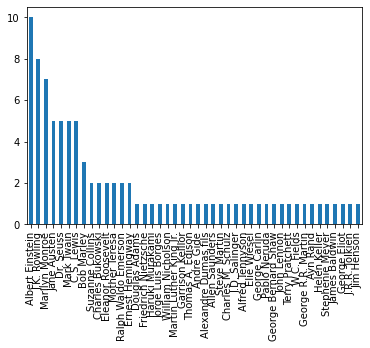

In [101]:
df['author'].value_counts().plot(kind='bar')

# thống kê dữ liệu theo độ tắng dần của độ tuổi 

In [100]:
df_sort_age = df.sort_values('age', ascending=True)
df_sort_age[70:90]

,quote,author,link,dob,age
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling,1835-11-30,186
2,“There are only two ways to live your life. On...,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1835-11-30,186
5,“Try not to become a man of success. Rather be...,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1835-11-30,186
12,"“If you can't explain it to a six year old, yo...",Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1835-11-30,186
26,"“If you want your children to be intelligent, ...",Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1835-11-30,186
28,“Logic will get you from A to Z; imagination w...,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1835-11-30,186
44,“Life is like riding a bicycle. To keep your b...,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1835-11-30,186
88,“A lie can travel half way around the world wh...,Mark Twain,https://quotes.toscrape.com/author/Mark-Twain,1835-11-30,186
53,"“If I were not a physicist, I would probably b...",Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1835-11-30,186
37,“Any fool can know. The point is to understand.”,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1835-11-30,186


# **trích xuất dữ liệu**
# xử lí dữ liệu đầu vào: xóa kí tự đặc biệt,khoảng trắng,chuyển về chữ thường

In [104]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [105]:
df['clean_quote'] = df['quote'].apply(lambda x: clean_text(x))
df['clean_quote']

0     the world as we have created it is a process o...
1     it is our choices harry that show what we trul...
2     there are only two ways to live your life one ...
3     the person be it gentleman or lady who has not...
4     imperfection is beauty madness is genius and i...
                            ...                        
85    some day you will be old enough to start readi...
86    we are not necessarily doubting that god will ...
87    the fear of death follows from the fear of lif...
88    a lie can travel half way around the world whi...
89    i believe in christianity as i believe that th...
Name: clean_quote, Length: 90, dtype: object

# thống kê độ phổ biến của các từ 

In [106]:
top_N = 20

a = df['clean_quote'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)


rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

<FreqDist with 651 samples and 2194 outcomes>
    Word  Frequency
0    you         89
1    the         68
2     is         67
3     to         65
4      a         61
5      i         51
6     of         46
7    and         43
8     it         42
9    not         36
10    be         28
11  that         28
12    in         25
13   but         25
14  love         23
15   can         20
16    if         19
17  your         18
18  what         17
19  have         16


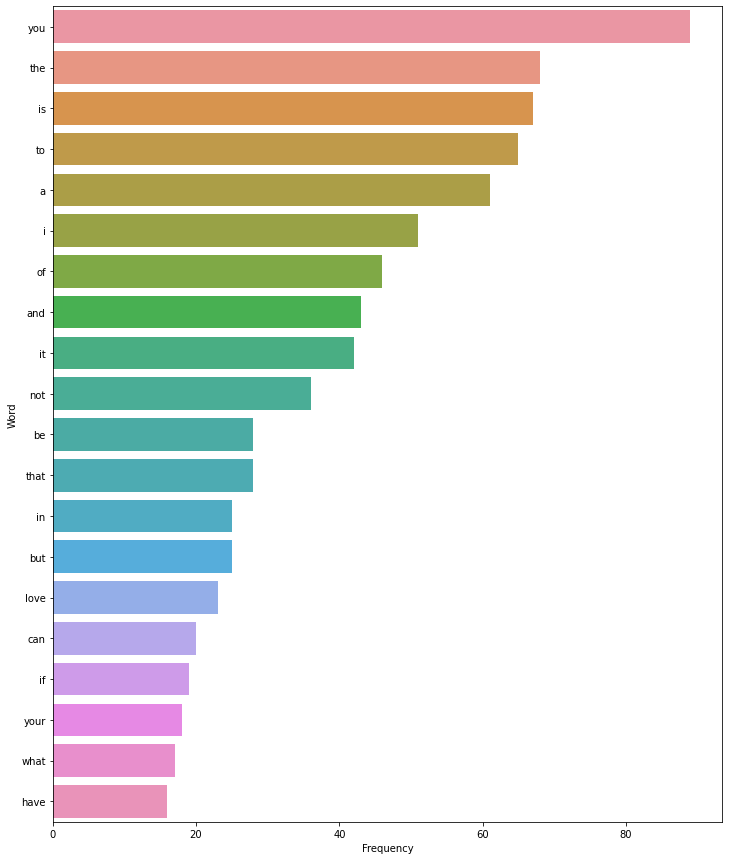

In [35]:
import matplotlib.pyplot as plt 
import seaborn as sns
# visualize words and frequencies
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=rslt, x= "Frequency", y = "Word") 
ax.set(ylabel = 'Word') 
plt.show()

# xóa các stopwords

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)
  
df['clean_quote'] = df['clean_quote'].apply(lambda x: remove_stopwords(x))

In [108]:
df['clean_quote']

0     world created process thinking cannot changed ...
1                choices harry show truly far abilities
2     two ways live life one though nothing miracle ...
3     person gentleman lady pleasure good novel must...
4     imperfection beauty madness genius better abso...
                            ...                        
85             day old enough start reading fairy tales
86    necessarily doubting god best us wondering pai...
87    fear death follows fear life man lives fully p...
88    lie travel half way around world truth putting...
89    believe christianity believe sun risen see see...
Name: clean_quote, Length: 90, dtype: object

# thống kê độ phổ biến của các từ sau khi xóa các stopwords

In [109]:
top_N = 20

a = df['clean_quote'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)


rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

<FreqDist with 552 samples and 990 outcomes>
        Word  Frequency
0       love         23
1        one         14
2      think         12
3      never         11
4       life         10
5       make         10
6       like          9
7       good          8
8       dont          8
9       know          7
10       day          7
11     going          7
12      give          7
13       may          7
14       see          7
15     world          6
16   without          6
17      live          6
18   friends          6
19  remember          6


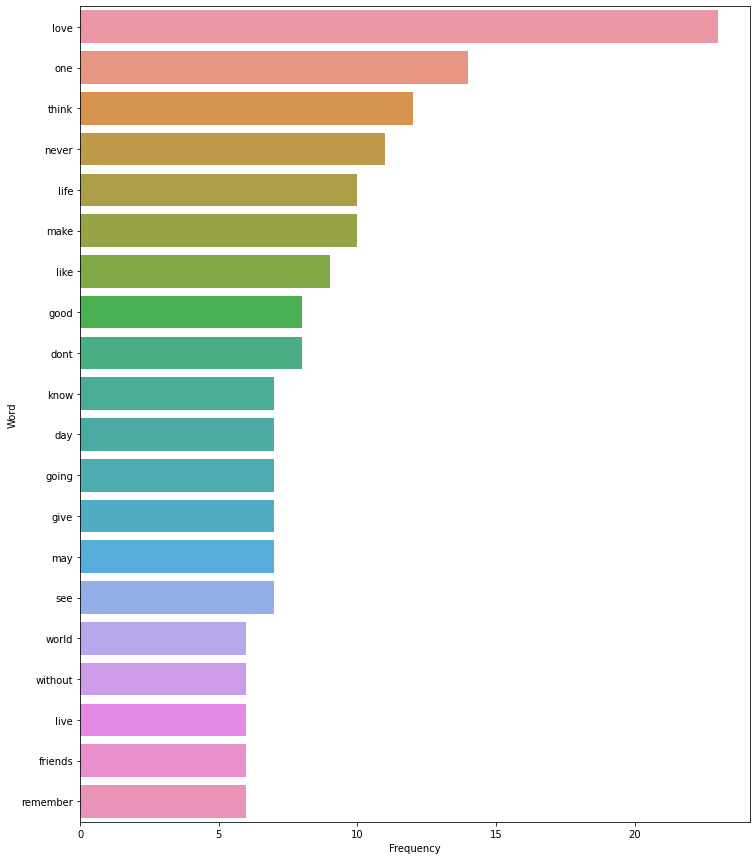

In [110]:
import matplotlib.pyplot as plt 
import seaborn as sns
# visualize words and frequencies
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=rslt, x= "Frequency", y = "Word") 
ax.set(ylabel = 'Word') 
plt.show()

In [111]:

X=df['clean_quote']
X

0     world created process thinking cannot changed ...
1                choices harry show truly far abilities
2     two ways live life one though nothing miracle ...
3     person gentleman lady pleasure good novel must...
4     imperfection beauty madness genius better abso...
                            ...                        
85             day old enough start reading fairy tales
86    necessarily doubting god best us wondering pai...
87    fear death follows fear life man lives fully p...
88    lie travel half way around world truth putting...
89    believe christianity believe sun risen see see...
Name: clean_quote, Length: 90, dtype: object

# trích xuất đặc trưng bằng mô hinh Bag of Words

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X).toarray()

In [113]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# xác định độ quan trọng của một từ bằng TF-IDF

In [114]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [115]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.42364854, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [116]:
y=df['author']

# chia tập train và test

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [118]:
y_train

37        Albert Einstein
67    Ralph Waldo Emerson
60       Charles Bukowski
88             Mark Twain
21    Ralph Waldo Emerson
             ...         
75          George Carlin
20           Pablo Neruda
9            Steve Martin
28        Albert Einstein
15          Douglas Adams
Name: author, Length: 72, dtype: object

In [119]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [120]:
X_train

array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.214019, ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]])

# áp dụng RandomForestClassifier để dự đoán tên tác giải dựa trên quote

In [121]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [122]:
y_pred = classifier.predict(X_test)

# tính toán các độ đo accuracy, f1-score,..

In [123]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1 0 0 0 1 0 0 0 0 3 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
                        precision    recall  f1-score   support

       Albert Einstein       0.25      0.17      0.20         6
              Ayn Rand       0.00      0.00      0.00         1
            C.S. Lewis       0.00      0.00      0.00         2
     Charles M. Schulz       0.00      0.00      0.00         1
             Dr. Seuss       0.00      0.00      0.00         0
     Eleanor Roosevelt       0.00      0.00      0.00         0
      Ernest Hemingway       0.00      0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
y_pred[5]


'Ernest Hemingway'

# dùng mô hình cosine_similarity tính khoảng cách cosin để xác định độ tương tự của văn bản

In [124]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(X)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,1.000000,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.097764,0.015575,0.0,0.000000,0.057399,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.075571,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.054547,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.059928,0.000000,0.160777,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.069563,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.051091,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.042209,0.0,0.0,0.000000,0.064863,0.000000
1,0.000000,1.0,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.116632,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.109194,0.000000,0.000000,0.0,0.000000,0.000000,0.136122,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,0.000000,0.0,1.000000,0.0,0.0,0.0000,0.000000,0.102325,0.0,0.000000,0.065818,0.0,0.000000,0.028760,0.0,0.0,0.020848,0.0,0.048838,0.066864,0.000000,0.0,0.000000,0.000000,0.000000,0.047605,0.000000,0.095534,0.0,0.047596,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.070702,0.061015,0.000000,0.074867,0.000000,0.0000,0.0,0.0,0.055838,0.120044,0.029010,0.000000,0.0,0.015566,0.0,0.060916,0.088347,0.000000,0.0,0.022783,0.000000,0.000000,0.0,0.0,0.116016,0.046885,0.109795,0.0,0.0,0.0,0.0,0.0,0.000000,0.031300,0.000000,0.0,0.0,0.038586,0.000000,0.069942
3,0.000000,0.0,0.000000,1.0,0.0,0.0000,0.000000,0.000000,0.0,0.000000,0.015584,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.137802,0.000000,0.000000,0.0,0.000000,0.057901,0.074682,0.000000,0.000000,0.000000,0.0,0.079643,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.059964,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.027677,0.145872,0.0,0.030596,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.081840,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.038421,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.0,1.0,0.0000,0.158067,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.064238,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.2052,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.0,0.115888,0.000000,0.0,0.127442,0.027660,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.343965,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.131637,0.000000,0.000000,0.092793,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.167548,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.066817,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.080877,0.054455,1.0,0.0,0.000000,0.000000,0.000000
86,0.00000

# nhóm các quote tương tự với lại bằng dendrogram, linkage

In [125]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,30,36,1.02351,2
1,26,85,1.03915,2
2,20,49,1.0793,2
3,23,43,1.08926,2
4,35,46,1.09141,2
...,...,...,...,...
84,165,172,2.00237,45
85,170,174,2.10954,55
86,161,175,2.15907,65
87,173,176,2.31645,82


In [126]:
df_quote_au =df[['quote', 'author']]
df_quote_au

,quote,author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe
...,...,...
85,“Some day you will be old enough to start read...,C.S. Lewis
86,“We are not necessarily doubting that God will...,C.S. Lewis
87,“The fear of death follows from the fear of li...,Mark Twain
88,“A lie can travel half way around the world wh...,Mark Twain


# phân nhãn cho các cụm quote và tác giải có độ tương đồng với nhau

In [127]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
tuong_dong=pd.concat([df_quote_au, cluster_labels], axis=1)

In [128]:
tuong_dong

,quote,author,ClusterLabel
0,“The world as we have created it is a process ...,Albert Einstein,89
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,75
2,“There are only two ways to live your life. On...,Albert Einstein,79
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,81
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,70
...,...,...,...
85,“Some day you will be old enough to start read...,C.S. Lewis,19
86,“We are not necessarily doubting that God will...,C.S. Lewis,85
87,“The fear of death follows from the fear of li...,Mark Twain,40
88,“A lie can travel half way around the world wh...,Mark Twain,90
